In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import pickle
# Loading your IBM Q account(s)
# provider = IBMQ.load_account()

c:\Users\Sadim\miniconda3\envs\quantum_oct23\lib\site-packages\qiskit\version.py:21: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [2]:
# Set the state we wish to search 
N = '0110101000'
num_qubits = len(N)

# Create the quantum circuit 
qc = QuantumCircuit(num_qubits)

# Set all qubits in superposition
qc.h(range(num_qubits))
qc.barrier()

#Draw the circuit
qc.draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     ├───┤ ░ 
q_2: ┤ H ├─░─
     ├───┤ ░ 
q_3: ┤ H ├─░─
     ├───┤ ░ 
q_4: ┤ H ├─░─
     ├───┤ ░ 
q_5: ┤ H ├─░─
     ├───┤ ░ 
q_6: ┤ H ├─░─
     ├───┤ ░ 
q_7: ┤ H ├─░─
     ├───┤ ░ 
q_8: ┤ H ├─░─
     ├───┤ ░ 
q_9: ┤ H ├─░─
     └───┘ ░

In [3]:
# Create custom cx gate with multiple controls
from qiskit.circuit.library.standard_gates import XGate

multi_cx_gate = XGate().control(num_qubits-1)

In [4]:
# Reverse the state so it’s in proper qubit ordering
N = N[::-1]

# Encode N into our circuit
for idx in range(num_qubits):
    if N[idx] == '0':
        qc.x(idx)
qc.barrier()

# Draw the circuit
qc.draw()

┌───┐ ░ ┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░─
     ├───┤ ░ ├───┤ ░ 
q_1: ┤ H ├─░─┤ X ├─░─
     ├───┤ ░ ├───┤ ░ 
q_2: ┤ H ├─░─┤ X ├─░─
     ├───┤ ░ └───┘ ░ 
q_3: ┤ H ├─░───────░─
     ├───┤ ░ ┌───┐ ░ 
q_4: ┤ H ├─░─┤ X ├─░─
     ├───┤ ░ └───┘ ░ 
q_5: ┤ H ├─░───────░─
     ├───┤ ░ ┌───┐ ░ 
q_6: ┤ H ├─░─┤ X ├─░─
     ├───┤ ░ └───┘ ░ 
q_7: ┤ H ├─░───────░─
     ├───┤ ░       ░ 
q_8: ┤ H ├─░───────░─
     ├───┤ ░ ┌───┐ ░ 
q_9: ┤ H ├─░─┤ X ├─░─
     └───┘ ░ └───┘ ░

In [5]:
# Create the Grover oracle for our 3-qubit quantum circuit
qc.h(num_qubits-1)
# qc.ccx(0, 1, 2)
qc.append(multi_cx_gate, range(num_qubits))

qc.h(num_qubits-1)
qc.barrier()

# Draw the circuit
qc.draw()

┌───┐ ░ ┌───┐ ░                 ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ ├───┤ ░        │        ░ 
q_1: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ ├───┤ ░        │        ░ 
q_2: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ 
q_3: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░ ┌───┐ ░        │        ░ 
q_4: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ 
q_5: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░ ┌───┐ ░        │        ░ 
q_6: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ 
q_7: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░       ░        │        ░ 
q_8: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ 
q_9: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░

In [6]:
from qiskit.circuit.library.standard_gates import XGate
import inspect

# multi_cx_gate = XGate().control(num_qubits-1)
# qc.append(multi_cx_gate, range(num_qubits))
qc.draw()

┌───┐ ░ ┌───┐ ░                 ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ ├───┤ ░        │        ░ 
q_1: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ ├───┤ ░        │        ░ 
q_2: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ 
q_3: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░ ┌───┐ ░        │        ░ 
q_4: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ 
q_5: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░ ┌───┐ ░        │        ░ 
q_6: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ 
q_7: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░       ░        │        ░ 
q_8: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ 
q_9: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░

In [7]:
# Reset the value after the oracle
for idx in range(num_qubits):
    if N[idx] == '0':
        qc.x(idx)
qc.barrier()

# Draw the circuit
qc.draw()


┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─
     ├───┤ ░ ├───┤ ░        │        ░ ├───┤ ░ 
q_1: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─
     ├───┤ ░ ├───┤ ░        │        ░ ├───┤ ░ 
q_2: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ 
q_3: ┤ H ├─░───────░────────■────────░───────░─
     ├───┤ ░ ┌───┐ ░        │        ░ ┌───┐ ░ 
q_4: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ 
q_5: ┤ H ├─░───────░────────■────────░───────░─
     ├───┤ ░ ┌───┐ ░        │        ░ ┌───┐ ░ 
q_6: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ 
q_7: ┤ H ├─░───────░────────■────────░───────░─
     ├───┤ ░       ░        │        ░       ░ 
q_8: ┤ H ├─░───────░────────■────────░───────░─
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ ┌───┐ ░ 
q_9: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░

In [8]:
# Set all qubits in superposition
qc.h(range(num_qubits))
qc.x(range(num_qubits))
qc.barrier()

# Draw the circuit
qc.draw()

┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░─
     ├───┤ ░ ├───┤ ░        │        ░ ├───┤ ░ ├───┤├───┤ ░ 
q_1: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░─
     ├───┤ ░ ├───┤ ░        │        ░ ├───┤ ░ ├───┤├───┤ ░ 
q_2: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░ 
q_3: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░─
     ├───┤ ░ ┌───┐ ░        │        ░ ┌───┐ ░ ├───┤├───┤ ░ 
q_4: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░ 
q_5: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░─
     ├───┤ ░ ┌───┐ ░        │        ░ ┌───┐ ░ ├───┤├───┤ ░ 
q_6: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░ 
q_7: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░─
     ├───┤ ░       ░        │        ░       ░ ├───┤├───┤ ░ 
q_8: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░─
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ ┌───┐ ░ ├───┤├───┤ ░ 
q_9: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├─░─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░ └───┘└───┘ ░

In [9]:
# Apply another oracle, same as the previous, 
qc.h(num_qubits-1)
# qc.ccx(0, 1, 2)
qc.append(multi_cx_gate, range(num_qubits))
qc.h(num_qubits-1)
qc.barrier()

# Draw the circuit
qc.draw()

┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐┌───┐ ░                 ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░ ├───┤ ░        │        ░ ├───┤ ░ ├───┤├───┤ ░        │        ░ 
q_1: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░ ├───┤ ░        │        ░ ├───┤ ░ ├───┤├───┤ ░        │        ░ 
q_2: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░        │        ░ 
q_3: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░ ┌───┐ ░        │        ░ ┌───┐ ░ ├───┤├───┤ ░        │        ░ 
q_4: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░        │        ░ 
q_5: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░ ┌───┐ ░        │        ░ ┌───┐ ░ ├───┤├───┤ ░        │        ░ 
q_6: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░        │        ░ 
q_7: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░       ░        │        ░       ░ ├───┤├───┤ ░        │        ░ 
q_8: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ ┌───┐ ░ ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ 
q_9: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░

In [10]:
# Reapply the X rotations on all qubits
qc.x(range(num_qubits))

qc.barrier()

# Reapply Hadamard gates to all qubits
qc.h(range(num_qubits))

# Draw the circuit
qc.draw()

┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐┌───┐ ░                 ░ »
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░ ├───┤ ░        │        ░ ├───┤ ░ ├───┤├───┤ ░        │        ░ »
q_1: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░ ├───┤ ░        │        ░ ├───┤ ░ ├───┤├───┤ ░        │        ░ »
q_2: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░        │        ░ »
q_3: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░ ┌───┐ ░        │        ░ ┌───┐ ░ ├───┤├───┤ ░        │        ░ »
q_4: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░        │        ░ »
q_5: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░ ┌───┐ ░        │        ░ ┌───┐ ░ ├───┤├───┤ ░        │        ░ »
q_6: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░        │        ░ »
q_7: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░       ░        │        ░       ░ ├───┤├───┤ ░        │        ░ »
q_8: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ ┌───┐ ░ ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ »
q_9: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─»
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░ »
«     ┌───┐ ░ ┌───┐
«q_0: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_1: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_2: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_3: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_4: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_5: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_6: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_7: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_8: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_9: ┤ X ├─░─┤ H ├
«     └───┘ ░ └───┘

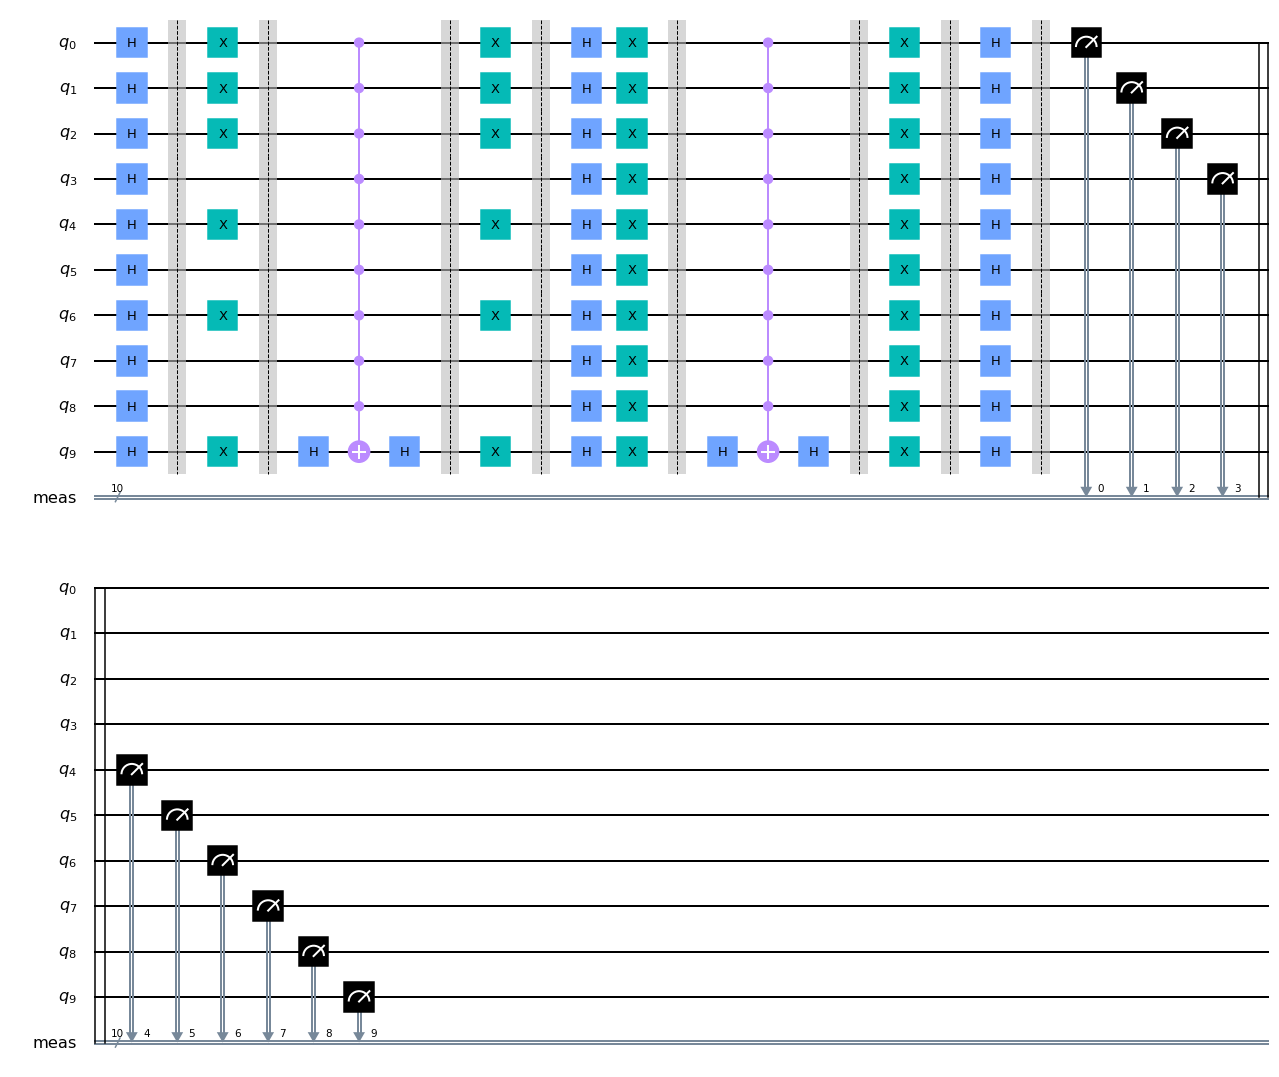

In [11]:
# Add measurement operators
qc.measure_all()

# Draw the circuit
qc.draw("mpl").savefig("grover.jpg")


## Run Grover's algorithm circuit on simulated backend without noise

0110101000: 180
Initial string: 0001010110
Reverse initial string: 0110101000


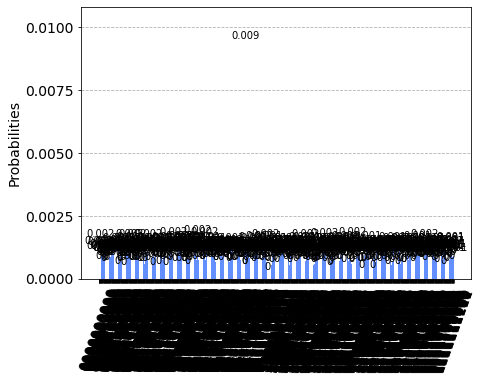

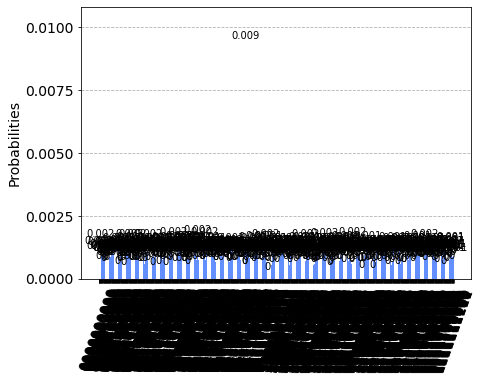

In [12]:
# Run on the qasm simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the backend, without adding the noise model
job = execute(qc, backend, shots=20000)

# Extract the results
results = job.result()
counts = results.get_counts(qc)

# Print and plot results
print(f"{max(counts, key = counts.get)}: {max(counts.values())}")
print(f"Initial string: {N}")
print(f"Reverse initial string: {N[::-1]}")
plot_histogram(counts)

## Run Grover's algorithm circuit on simulated backend with noise model (locally)

In [15]:
# with open('noise.pkl', 'rb') as handle:
#     noise_model = pickle.load(handle)

# # Get coupling map from backend
# # coupling_map = backend.configuration().coupling_map
# with open('coupling.pkl', 'rb') as handle:
#     coupling_map = pickle.load(handle)

# # Get basis gates from noise model
# basis_gates = noise_model.basis_gates

from utils import load_backend
coupling_map, basis_gates, noise_model = load_backend('ibm_sherbrooke')

# Execute the circuit on the simulator with the backend properties, 
# and generated noise model
results = execute(qc, Aer.get_backend('qasm_simulator'), shots = 20000,
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
# Obtain and print results
counts = results.get_counts()
print(f"{max(counts, key = counts.get)}: {max(counts.values())}")
print(f"Initial string: {N}")
print(f"Reverse initial string: {N[::-1]}")
plot_histogram(counts)

FileNotFoundError: [Errno 2] No such file or directory: 'noise_ibm_sherbrooke.pkl'

## Run Grover's algorithm circuit on actual quantum hardware

In [ ]:
backend = provider.get_backend('ibm_sherbrooke')
print("Set backend: ", backend)

# Execute the circuit on the backend
job = execute(qc, backend, shots=20000)

# Extract the results
results = job.result()
counts = results.get_counts(qc)
# Print and plot results
print(counts)
print(f"{max(counts, key = counts.get)}: {max(counts.values())}")
print(f"Initial string: {N}")
print(f"Reverse initial string: {N[::-1]}")
plot_histogram(counts).savefig('grover7_sherbrooke.jpg')

# still contains errors. Tried imb_osaka and ibm_brisbane
# 2024 update: turns out that upgrading qiskit to 0.39.4 solves this problem.

Set backend:  ibm_sherbrooke
